In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [44]:
supermarket=pd.read_csv('supermarket_sales - Sheet1.csv')

In [26]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [27]:
supermarket.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [28]:
supermarket.duplicated().sum()

0

In [82]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Profits,Review,Months,Days
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,...,15:51,Cash,126.44,4.761905,6.322,8.5,120.118,Very Good,1,1
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,...,19:48,Credit card,369.80,4.761905,18.490,7.0,351.310,Very Good,1,1
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,...,13:55,Cash,591.66,4.761905,29.583,7.7,562.077,Very Good,1,1
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,...,11:43,Cash,125.74,4.761905,6.287,5.0,119.453,Good,1,1
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,...,11:36,Credit card,846.30,4.761905,42.315,9.0,803.985,Great,1,1


In [48]:
supermarket.sort_values("Date",inplace=True)

In [49]:
supermarket.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Profits
393,308-47-4913,A,Yangon,Member,Female,Sports and travel,52.26,10,26.1300,548.7300,3/9/2019,12:45,Credit card,522.60,4.761905,26.1300,6.2,496.4700
73,841-35-6630,C,Naypyitaw,Normal,Female,Electronic accessories,75.91,6,22.7730,478.2330,3/9/2019,18:21,Cash,455.46,4.761905,22.7730,8.7,432.6870
433,616-87-0016,B,Mandalay,Normal,Male,Fashion accessories,95.54,7,33.4390,702.2190,3/9/2019,14:36,Credit card,668.78,4.761905,33.4390,9.6,635.3410
585,127-47-6963,A,Yangon,Normal,Male,Health and beauty,51.71,4,10.3420,217.1820,3/9/2019,13:53,Credit card,206.84,4.761905,10.3420,9.8,196.4980
84,360-39-5055,C,Naypyitaw,Member,Male,Sports and travel,48.91,5,12.2275,256.7775,3/9/2019,10:17,Cash,244.55,4.761905,12.2275,6.6,232.3225


In [50]:
supermarket[supermarket['Gender']=='Female']['Customer type'].value_counts()

Member    261
Normal    240
Name: Customer type, dtype: int64

In [51]:
supermarket[supermarket['Gender']=='Male']['Customer type'].value_counts()

Normal    259
Member    240
Name: Customer type, dtype: int64

In [52]:
supermarket['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [79]:
supermarket['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [53]:
A=supermarket.groupby("Customer type")
A["cogs"].describe()

,count,mean,std,min,25%,50%,75%,max
Customer type,,,,,,,,
Member,501.0,312.182196,236.184554,10.17,112.62,253.36,462.45,993.0
Normal,499.0,302.974148,232.288381,12.09,123.08,226.12,440.58,989.8


In [54]:
def Review(Rating):
  if Rating < 5:
    return "Not Good"
  elif Rating <7:
    return "Good"
  elif Rating < 9:
    return "Very Good"
  else:
    return "Great"


In [55]:
supermarket['Review']=supermarket['Rating'].apply(Review)

In [10]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Review
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5,Very Good
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0,Very Good
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7,Very Good
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0,Good
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0,Great


<Axes: xlabel='Review', ylabel='count'>

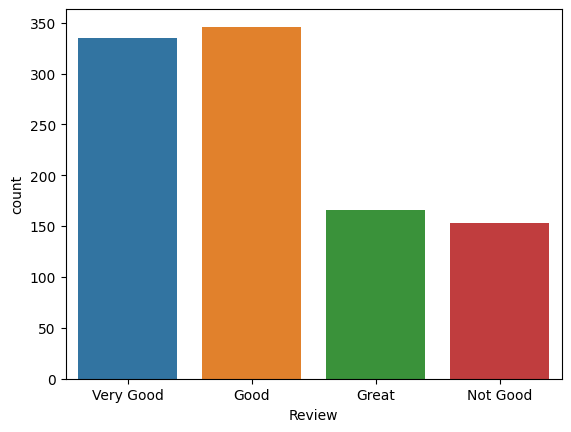

In [56]:
sns.countplot(data=supermarket,x='Review')

<font color="DarkOrange"> **The rating about products in supermarket didn't reach the desirable rate** </font>



<Axes: xlabel='Product line', ylabel='count'>

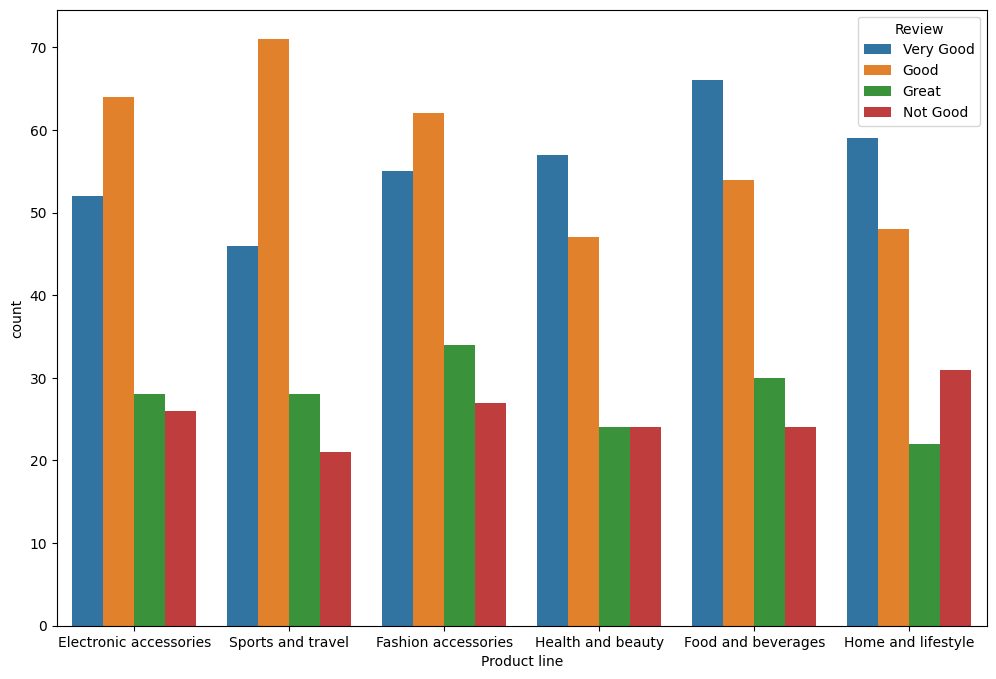

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(data=supermarket,x='Product line',hue='Review')

<font color="Crimson"> **The most bad rating in the home and lifestyle section** </font>



In [58]:
supermarket[supermarket['Review']=='Not Good']['Branch'].value_counts()

B    59
A    52
C    42
Name: Branch, dtype: int64

In [59]:
supermarket[supermarket['Review']=='Great']['Branch'].value_counts()

A    62
C    60
B    44
Name: Branch, dtype: int64

<font color="Purple"> **The Best and The worst rating in the branches** </font>





In [60]:
supermarket["Profits"]=(supermarket["Unit price"]*supermarket["Quantity"])-supermarket["Tax 5%"]
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Profits,Review
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5,120.118,Very Good
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0,351.310,Very Good
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7,562.077,Very Good
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0,119.453,Good
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0,803.985,Great


<Axes: xlabel='Product line', ylabel='Profits'>

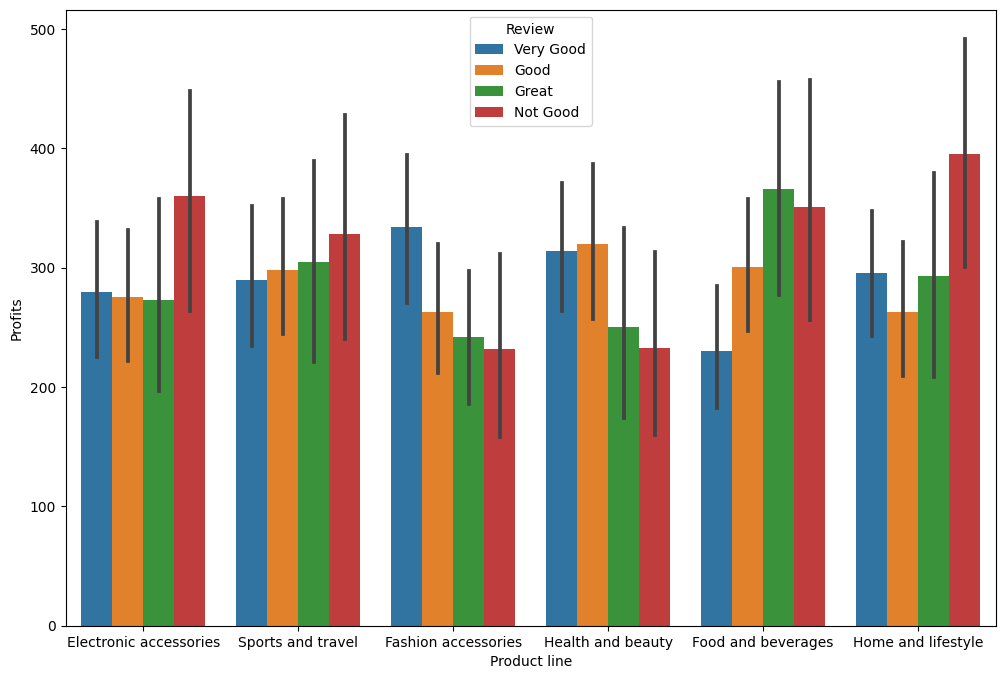

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product line',y='Profits',hue='Review',data=supermarket)

<font color="SeaGreen"> **We have to target the home and lifestyle section because it brings the highest profit but the least customer satisfaction** </font>


<Axes: xlabel='Product line', ylabel='Profits'>

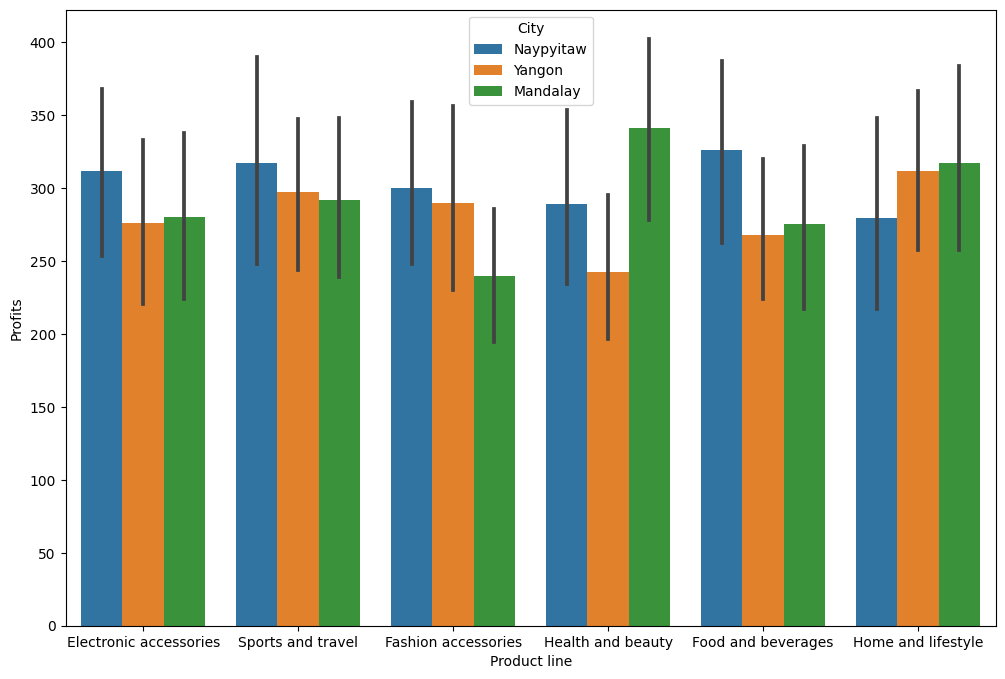

In [81]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product line',y='Profits',hue='City',data=supermarket)

<font color="FireBrick"> **There is a problem with the sales of the yangon branch in the health and beauty section** </font>

In [78]:
import datetime
supermarket["Months"]=pd.DatetimeIndex(supermarket['Date']).month
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Profits,Review,Months,Days
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,...,15:51,Cash,126.44,4.761905,6.322,8.5,120.118,Very Good,1,1
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,...,19:48,Credit card,369.80,4.761905,18.490,7.0,351.310,Very Good,1,1
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,...,13:55,Cash,591.66,4.761905,29.583,7.7,562.077,Very Good,1,1
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,...,11:43,Cash,125.74,4.761905,6.287,5.0,119.453,Good,1,1
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,...,11:36,Credit card,846.30,4.761905,42.315,9.0,803.985,Great,1,1


In [71]:
supermarket["Months"].value_counts()

1    352
3    345
2    303
Name: Months, dtype: int64

<Axes: xlabel='Months', ylabel='Profits'>

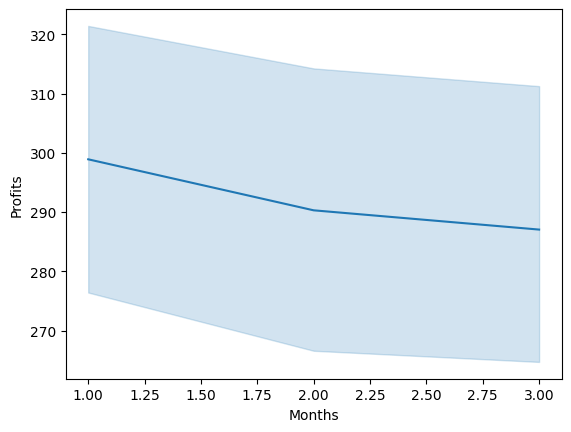

In [77]:
sns.lineplot(x="Months",y="Profits",data=supermarket)


<font color="FireBrick"> **The percentage of profits decreases during the three months** </font>

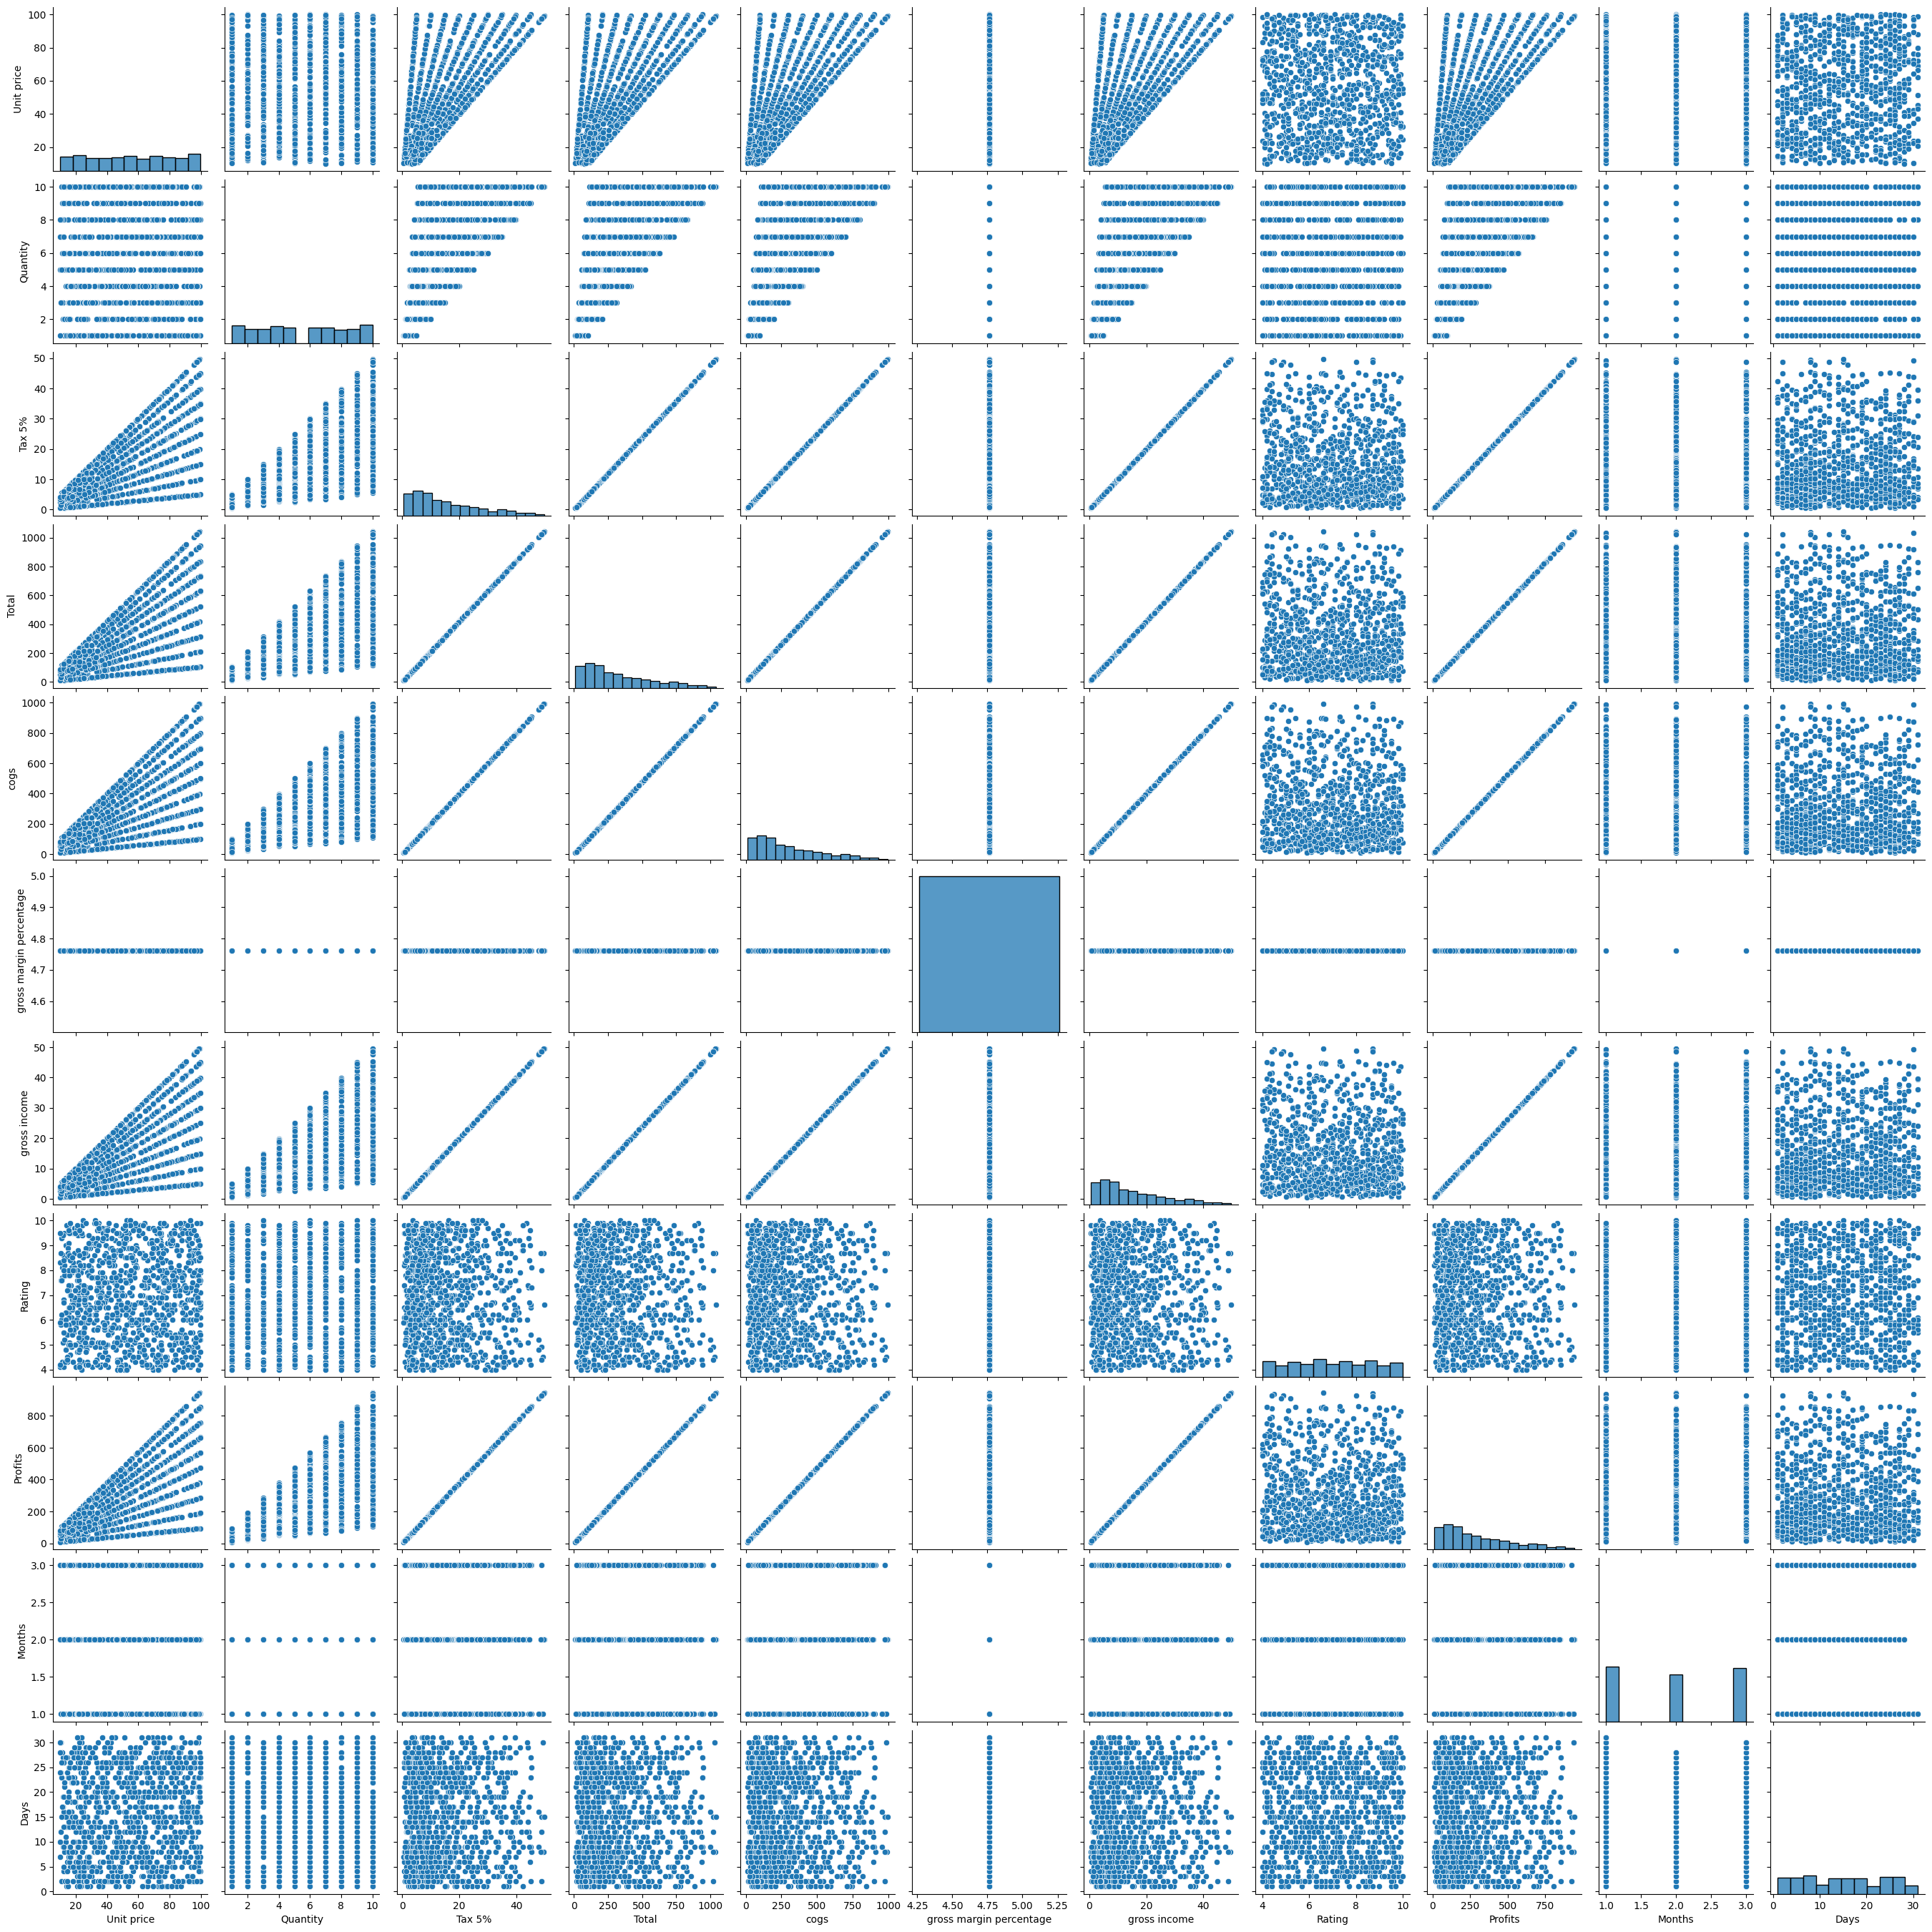

In [83]:
sns.pairplot(data=supermarket)